In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import sklearn.preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn import linear_model

In [2]:
all_data = pd.read_csv('graphs_100_clean_biasLabels_features_df.csv')

In [3]:
all_data[all_data['bias'] == 1]['num_nodes'].mean()

751.9879807692307

In [4]:
all_data[all_data['bias'] == 0]['num_nodes'].mean()

837.5833333333334

In [6]:
all_data.columns

Index(['density', 'num_nodes', 'num_edges', 'mean_avg_deg_connect',
       'max_avg_deg_connect', 'mean_closeness_cen', 'max_closeness_cen',
       'mean_in_deg_cen', 'max_in_deg_cen', 'skew_in_deg_cen',
       'std_in_deg_cen', 'mean_out_deg_cen', 'max_out_deg_cen',
       'skew_out_deg_cen', 'std_out_deg_cen', 'size_max_clique',
       'num_max_cliques', 'num_conn_components', 'bias'],
      dtype='object')

In [7]:
all_data_no_numNodesEdges = all_data.drop(['num_nodes', 'num_edges'], axis = 1)

In [8]:
all_data_no_numNodesEdges.columns

Index(['density', 'mean_avg_deg_connect', 'max_avg_deg_connect',
       'mean_closeness_cen', 'max_closeness_cen', 'mean_in_deg_cen',
       'max_in_deg_cen', 'skew_in_deg_cen', 'std_in_deg_cen',
       'mean_out_deg_cen', 'max_out_deg_cen', 'skew_out_deg_cen',
       'std_out_deg_cen', 'size_max_clique', 'num_max_cliques',
       'num_conn_components', 'bias'],
      dtype='object')

In [9]:
len(all_data.columns)

19

In [10]:
len(all_data_no_numNodesEdges.columns)

17

In [11]:
np.random.seed(100)
lib_ind = np.random.choice(all_data[all_data['bias'] == 1].index, size = len(all_data[all_data['bias'] == 0]), replace = False)
cons_ind = all_data[all_data['bias'] == 0].index

balanced_ind = lib_ind.tolist() + cons_ind.tolist()

In [12]:
np.random.seed(100)
test_data_indices = np.random.choice(balanced_ind, size = 80, replace = False)
train_data_indices = [i for i in balanced_ind if i not in test_data_indices]

In [13]:
for i in test_data_indices:
    if i in train_data_indices:
        print(i)

In [14]:
test_df = all_data.loc[(test_data_indices), :]
train_df = all_data.loc[(train_data_indices), :]

In [217]:
train_x = train_df.iloc[:, :-1]
train_y = train_df.iloc[:, -1]

test_x = test_df.iloc[:, :-1]
test_y = test_df.iloc[:, -1]

In [219]:
np.sum(train_y.values)/len(train_y.values)

0.515625

In [220]:
scaler = sklearn.preprocessing.StandardScaler()
train_x_standard = scaler.fit_transform(train_x)
test_x_standard = scaler.transform(test_x)

In [221]:
# random forest tuning
rand_forest = RandomForestClassifier(n_estimators = 501)

parameter_grid_rand = {'max_features' : [2, 4, 8, 12], 'max_depth' : [2, 4, 6],\
                  'class_weight': [None, 'balanced']}

grid_rand = sklearn.model_selection.GridSearchCV(rand_forest, parameter_grid_rand, cv = 4, verbose = 2,\
                                                 scoring = ['neg_log_loss', 'precision', 'recall', 'f1', 'accuracy'],\
                                                refit = 'accuracy')
grid_rand.fit(train_x_standard, train_y.values)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV] class_weight=None, max_depth=2, max_features=2 ..................
[CV] ... class_weight=None, max_depth=2, max_features=2, total=   0.8s
[CV] class_weight=None, max_depth=2, max_features=2 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ... class_weight=None, max_depth=2, max_features=2, total=   0.8s
[CV] class_weight=None, max_depth=2, max_features=2 ..................
[CV] ... class_weight=None, max_depth=2, max_features=2, total=   0.8s
[CV] class_weight=None, max_depth=2, max_features=2 ..................
[CV] ... class_weight=None, max_depth=2, max_features=2, total=   0.8s
[CV] class_weight=None, max_depth=2, max_features=4 ..................
[CV] ... class_weight=None, max_depth=2, max_features=4, total=   0.8s
[CV] class_weight=None, max_depth=2, max_features=4 ..................
[CV] ... class_weight=None, max_depth=2, max_features=4, total=   0.7s
[CV] class_weight=None, max_depth=2, max_features=4 ..................
[CV] ... class_weight=None, max_depth=2, max_features=4, total=   0.8s
[CV] class_weight=None, max_depth=2, max_features=4 ..................
[CV] ... class_weight=None, max_depth=2, max_features=4, total=   0.7s
[CV] class_weight=None, max_depth=2, max_features=8 ..................
[CV] .

[CV]  class_weight=balanced, max_depth=2, max_features=8, total=   0.7s
[CV] class_weight=balanced, max_depth=2, max_features=12 .............
[CV]  class_weight=balanced, max_depth=2, max_features=12, total=   0.8s
[CV] class_weight=balanced, max_depth=2, max_features=12 .............
[CV]  class_weight=balanced, max_depth=2, max_features=12, total=   0.8s
[CV] class_weight=balanced, max_depth=2, max_features=12 .............
[CV]  class_weight=balanced, max_depth=2, max_features=12, total=   0.8s
[CV] class_weight=balanced, max_depth=2, max_features=12 .............
[CV]  class_weight=balanced, max_depth=2, max_features=12, total=   0.8s
[CV] class_weight=balanced, max_depth=4, max_features=2 ..............
[CV]  class_weight=balanced, max_depth=4, max_features=2, total=   0.7s
[CV] class_weight=balanced, max_depth=4, max_features=2 ..............
[CV]  class_weight=balanced, max_depth=4, max_features=2, total=   0.7s
[CV] class_weight=balanced, max_depth=4, max_features=2 ..........

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  1.8min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=501, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [2, 4, 8, 12], 'max_depth': [2, 4, 6], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring=['neg_log_loss', 'precision', 'recall', 'f1', 'accuracy'],
       verbose=2)

In [222]:
pd.DataFrame(grid_rand.cv_results_)

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\uti

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_neg_log_loss,mean_test_precision,mean_test_recall,mean_train_accuracy,mean_train_f1,mean_train_neg_log_loss,...,std_test_accuracy,std_test_f1,std_test_neg_log_loss,std_test_precision,std_test_recall,std_train_accuracy,std_train_f1,std_train_neg_log_loss,std_train_precision,std_train_recall
0,0.698699,0.183230,0.617188,0.631113,-0.638906,0.624319,0.643939,0.760417,0.755815,-0.576128,...,0.042072,0.056953,0.018807,0.029774,0.096721,0.009744,0.012206,0.008425,0.015681,0.024089
1,0.687943,0.164711,0.640625,0.655972,-0.625175,0.645238,0.674242,0.760417,0.756417,-0.554321,...,0.024705,0.046433,0.017983,0.013678,0.096721,0.016470,0.018851,0.010817,0.015244,0.027198
2,0.725504,0.166274,0.656250,0.664628,-0.615836,0.664015,0.666667,0.751302,0.744776,-0.539263,...,0.063469,0.069451,0.017479,0.049659,0.090909,0.010001,0.013837,0.013252,0.007576,0.025126
3,0.881399,0.193044,0.656250,0.662461,-0.613915,0.667204,0.659091,0.752604,0.745912,-0.530510,...,0.065364,0.071285,0.017982,0.057068,0.086709,0.005823,0.007707,0.015208,0.010882,0.016559
4,0.637554,0.172272,0.652344,0.651603,-0.619321,0.672757,0.636364,0.867188,0.864947,-0.452456,...,0.079192,0.082994,0.025094,0.073664,0.102763,0.024568,0.025802,0.014384,0.022392,0.028903
5,0.675259,0.164775,0.656250,0.649958,-0.618423,0.678713,0.628788,0.864583,0.863487,-0.422558,...,0.067206,0.080195,0.032389,0.056613,0.107938,0.018042,0.018430,0.016271,0.018119,0.019397
6,0.759629,0.163623,0.667969,0.657834,-0.615089,0.697708,0.628788,0.885417,0.884826,-0.397354,...,0.067545,0.079839,0.039428,0.060435,0.107938,0.015185,0.015252,0.019038,0.017608,0.015152
7,0.858457,0.161959,0.667969,0.661159,-0.617921,0.695085,0.636364,0.884115,0.884765,-0.383547,...,0.058854,0.068611,0.040478,0.052556,0.098193,0.018552,0.018975,0.018165,0.014627,0.023144
8,0.702460,0.171777,0.656250,0.655785,-0.626109,0.675551,0.643939,0.950521,0.950921,-0.331836,...,0.071603,0.080704,0.041724,0.064565,0.107938,0.005823,0.005594,0.015644,0.011507,0.007142
9,0.729323,0.209194,0.636719,0.635558,-0.631578,0.658022,0.621212,0.963542,0.963942,-0.299009,...,0.079959,0.084390,0.056369,0.074366,0.108203,0.005208,0.004972,0.015982,0.011552,0.005051


In [223]:
# logit tuning
logit = sklearn.linear_model.LogisticRegression()

parameter_grid_logit = {'penalty' : ['l1', 'l2'], 'C' : [1000, 100, 10, 1, 0.1, 0.01],\
                  'class_weight': [None, 'balanced']}

grid_logit = sklearn.model_selection.GridSearchCV(logit, parameter_grid_logit, cv = 4, verbose = 2,\
                                                  scoring = ['neg_log_loss', 'precision', 'recall', 'f1', 'accuracy'],\
                                                  refit = 'accuracy')
grid_logit.fit(train_x_standard, train_y.values)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV] C=1000, class_weight=None, penalty=l1 ...........................
[CV] ............ C=1000, class_weight=None, penalty=l1, total=   0.5s
[CV] C=1000, class_weight=None, penalty=l1 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ............ C=1000, class_weight=None, penalty=l1, total=   0.1s
[CV] C=1000, class_weight=None, penalty=l1 ...........................
[CV] ............ C=1000, class_weight=None, penalty=l1, total=   0.4s
[CV] C=1000, class_weight=None, penalty=l1 ...........................
[CV] ............ C=1000, class_weight=None, penalty=l1, total=   0.6s
[CV] C=1000, class_weight=None, penalty=l2 ...........................
[CV] ............ C=1000, class_weight=None, penalty=l2, total=   0.0s
[CV] C=1000, class_weight=None, penalty=l2 ...........................
[CV] ............ C=1000, class_weight=None, penalty=l2, total=   0.0s
[CV] C=1000, class_weight=None, penalty=l2 ...........................
[CV] ............ C=1000, class_weight=None, penalty=l2, total=   0.0s
[CV] C=1000, class_weight=None, penalty=l2 ...........................
[CV] ............ C=1000, class_weight=None, penalty=l2, total=   0.0s
[CV] C=1000, class_weight=balanced, penalty=l1 .......................
[CV] .

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: Undef

[CV] ............. C=0.1, class_weight=None, penalty=l1, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l1 ............................
[CV] ............. C=0.1, class_weight=None, penalty=l1, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l2 ............................
[CV] ............. C=0.1, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l2 ............................
[CV] ............. C=0.1, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l2 ............................
[CV] ............. C=0.1, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.1, class_weight=None, penalty=l2 ............................
[CV] ............. C=0.1, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1 ........................
[CV] ......... C=0.1, class_weight=balanced, penalty=l1, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1 ........................
[CV] .

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: Undef

[CV] ............ C=0.01, class_weight=None, penalty=l1, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1 ...........................
[CV] ............ C=0.01, class_weight=None, penalty=l1, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l1 ...........................
[CV] ............ C=0.01, class_weight=None, penalty=l1, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2 ...........................
[CV] ............ C=0.01, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2 ...........................
[CV] ............ C=0.01, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2 ...........................
[CV] ............ C=0.01, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.01, class_weight=None, penalty=l2 ...........................
[CV] ............ C=0.01, class_weight=None, penalty=l2, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1 .......................
[CV] .

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    7.1s finished



[CV] C=0.01, class_weight=balanced, penalty=l2 .......................
[CV] ........ C=0.01, class_weight=balanced, penalty=l2, total=   0.0s


GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1000, 100, 10, 1, 0.1, 0.01], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring=['neg_log_loss', 'precision', 'recall', 'f1', 'accuracy'],
       verbose=2)

In [239]:
pd.DataFrame(grid_logit.cv_results_)

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\uti

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_neg_log_loss,mean_test_precision,mean_test_recall,mean_train_accuracy,mean_train_f1,mean_train_neg_log_loss,...,std_test_accuracy,std_test_f1,std_test_neg_log_loss,std_test_precision,std_test_recall,std_train_accuracy,std_train_f1,std_train_neg_log_loss,std_train_precision,std_train_recall
0,0.486735,0.002255,0.625000,0.642276,-1.032444,0.635709,0.651515,0.721354,0.731889,-0.577030,...,0.074116,0.066079,0.241081,0.075244,0.069433,0.014024,0.011919,0.008208,0.016141,0.010101
1,0.001750,0.003639,0.593750,0.607204,-0.999858,0.603846,0.613636,0.699219,0.706440,-0.588376,...,0.065364,0.071220,0.187541,0.062716,0.091851,0.020297,0.020334,0.009156,0.019659,0.022015
2,0.343362,0.003995,0.621094,0.627671,-0.980805,0.636995,0.621212,0.710938,0.712376,-0.582851,...,0.079959,0.079965,0.175510,0.082096,0.089638,0.017469,0.018074,0.009226,0.016955,0.020670
3,0.004000,0.001000,0.609375,0.610331,-1.001748,0.626176,0.598485,0.699219,0.698186,-0.588621,...,0.083415,0.089255,0.191794,0.082599,0.105790,0.030675,0.029083,0.009113,0.034217,0.025126
4,0.334980,0.003619,0.609375,0.623077,-0.977902,0.620513,0.628788,0.700521,0.708789,-0.583887,...,0.074116,0.075500,0.176955,0.075826,0.089317,0.015406,0.015777,0.007651,0.016231,0.021427
5,0.004000,0.000000,0.558594,0.570411,-0.961966,0.574631,0.575758,0.677083,0.678645,-0.606165,...,0.067545,0.074360,0.165678,0.070366,0.111340,0.031894,0.032255,0.010794,0.032388,0.035354
6,0.325562,0.004130,0.613281,0.619474,-0.987162,0.628680,0.613636,0.708333,0.707366,-0.583821,...,0.075240,0.077252,0.187134,0.075674,0.091851,0.016877,0.019608,0.007583,0.014168,0.027080
7,0.002001,0.002879,0.554688,0.550848,-0.963392,0.575911,0.537879,0.675781,0.667378,-0.606559,...,0.071175,0.080558,0.170736,0.078032,0.118094,0.027406,0.029944,0.010804,0.027238,0.032339
8,0.032140,0.003003,0.554688,0.563041,-0.927818,0.574605,0.560606,0.664062,0.666729,-0.611884,...,0.067658,0.067871,0.161182,0.074283,0.097017,0.031788,0.030081,0.011000,0.034865,0.030721
9,0.002993,0.001504,0.566406,0.576595,-0.866820,0.579257,0.583333,0.658854,0.665007,-0.617366,...,0.061887,0.078141,0.099617,0.063446,0.121920,0.035420,0.033625,0.010880,0.036430,0.034254


In [240]:
# svm tuning
svm = sklearn.svm.SVC()

parameter_grid_svm = {'kernel' : ['rbf', 'linear'], 'C' : [100, 10, 1, 0.1, 0.01],\
                  'class_weight': [None, 'balanced']}

grid_svm = sklearn.model_selection.GridSearchCV(svm, parameter_grid_svm, cv = 4, verbose = 2,\
                                                  scoring = ['precision', 'recall', 'f1', 'accuracy'],\
                                                  refit = 'accuracy')
grid_svm.fit(train_x_standard, train_y.values)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] C=100, class_weight=None, kernel=rbf ............................
[CV] ............. C=100, class_weight=None, kernel=rbf, total=   0.0s
[CV] C=100, class_weight=None, kernel=rbf ............................
[CV] ............. C=100, class_weight=None, kernel=rbf, total=   0.0s
[CV] C=100, class_weight=None, kernel=rbf ............................
[CV] ............. C=100, class_weight=None, kernel=rbf, total=   0.0s
[CV] C=100, class_weight=None, kernel=rbf ............................
[CV] ............. C=100, class_weight=None, kernel=rbf, total=   0.0s
[CV] C=100, class_weight=None, kernel=linear .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=100, class_weight=None, kernel=linear, total=   0.3s
[CV] C=100, class_weight=None, kernel=linear .........................
[CV] .......... C=100, class_weight=None, kernel=linear, total=   0.1s
[CV] C=100, class_weight=None, kernel=linear .........................
[CV] .......... C=100, class_weight=None, kernel=linear, total=   0.0s
[CV] C=100, class_weight=None, kernel=linear .........................
[CV] .......... C=100, class_weight=None, kernel=linear, total=   0.3s
[CV] C=100, class_weight=balanced, kernel=rbf ........................
[CV] ......... C=100, class_weight=balanced, kernel=rbf, total=   0.0s
[CV] C=100, class_weight=balanced, kernel=rbf ........................
[CV] ......... C=100, class_weight=balanced, kernel=rbf, total=   0.0s
[CV] C=100, class_weight=balanced, kernel=rbf ........................
[CV] ......... C=100, class_weight=balanced, kernel=rbf, total=   0.0s
[CV] C=100, class_weight=balanced, kernel=rbf ........................
[CV] .

[CV] ...... C=0.1, class_weight=balanced, kernel=linear, total=   0.0s
[CV] C=0.01, class_weight=None, kernel=rbf ...........................
[CV] ............ C=0.01, class_weight=None, kernel=rbf, total=   0.0s
[CV] C=0.01, class_weight=None, kernel=rbf ...........................
[CV] ............ C=0.01, class_weight=None, kernel=rbf, total=   0.0s
[CV] C=0.01, class_weight=None, kernel=rbf ...........................
[CV] ............ C=0.01, class_weight=None, kernel=rbf, total=   0.0s
[CV] C=0.01, class_weight=None, kernel=rbf ...........................
[CV] ............ C=0.01, class_weight=None, kernel=rbf, total=   0.0s
[CV] C=0.01, class_weight=None, kernel=linear ........................
[CV] ......... C=0.01, class_weight=None, kernel=linear, total=   0.0s
[CV] C=0.01, class_weight=None, kernel=linear ........................
[CV] ......... C=0.01, class_weight=None, kernel=linear, total=   0.0s
[CV] C=0.01, class_weight=None, kernel=linear ........................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.9s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear'], 'C': [100, 10, 1, 0.1, 0.01], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring=['precision', 'recall', 'f1', 'accuracy'], verbose=2)

In [241]:
pd.DataFrame(grid_svm.cv_results_)

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_f1'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_train_accuracy,mean_train_f1,mean_train_precision,mean_train_recall,...,std_fit_time,std_score_time,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_train_accuracy,std_train_f1,std_train_precision,std_train_recall
0,0.013881,0.011012,0.625000,0.637167,0.632910,0.643939,0.856771,0.857870,0.882693,0.835859,...,0.003402,0.001716,0.038273,0.051711,0.031762,0.075378,0.020003,0.016045,0.039954,0.016559
1,0.261952,0.003988,0.585938,0.576215,0.614967,0.553030,0.692708,0.679935,0.734587,0.633838,...,0.101564,0.000018,0.061018,0.067110,0.071735,0.105790,0.024150,0.027230,0.030083,0.035979
2,0.005630,0.004137,0.636719,0.636276,0.653274,0.621212,0.852865,0.850950,0.893671,0.813131,...,0.001712,0.000216,0.052262,0.064618,0.048013,0.078730,0.018183,0.015719,0.035329,0.016751
3,0.233121,0.004001,0.574219,0.559640,0.605327,0.530303,0.704427,0.683584,0.761409,0.621212,...,0.053611,0.002829,0.061887,0.065816,0.075037,0.099355,0.026653,0.034197,0.025992,0.045455
4,0.002991,0.005081,0.640625,0.630835,0.662448,0.606061,0.786458,0.784093,0.823454,0.750000,...,0.001727,0.001849,0.067206,0.083251,0.056753,0.113384,0.022999,0.016832,0.044497,0.014940
5,0.022640,0.003890,0.582031,0.561276,0.607975,0.530303,0.678385,0.663871,0.720264,0.616162,...,0.007224,0.000220,0.086557,0.106102,0.098001,0.136364,0.027157,0.028289,0.032339,0.030303
6,0.004379,0.004255,0.648438,0.636392,0.676184,0.606061,0.787760,0.781316,0.835474,0.734848,...,0.000656,0.000440,0.072028,0.085441,0.072188,0.113384,0.013469,0.010618,0.031232,0.018034
7,0.026877,0.004527,0.574219,0.548326,0.607420,0.507576,0.674479,0.649526,0.730388,0.585859,...,0.005927,0.000861,0.079959,0.091948,0.099141,0.112111,0.027927,0.032230,0.037016,0.038464
8,0.003626,0.007390,0.644531,0.615830,0.700831,0.568182,0.722656,0.691892,0.814818,0.603535,...,0.000648,0.001086,0.012956,0.050302,0.048244,0.127444,0.017806,0.011696,0.049494,0.024089
9,0.006545,0.004127,0.554688,0.558494,0.575750,0.553030,0.669271,0.661420,0.701508,0.626263,...,0.002568,0.000244,0.052408,0.058551,0.062921,0.103597,0.022851,0.020603,0.029789,0.021427


In [227]:
print(sklearn.metrics.accuracy_score(test_y, grid_rand.predict(test_x_standard)))
print(sklearn.metrics.log_loss(test_y, grid_rand.predict(test_x_standard)))
print(sklearn.metrics.f1_score(test_y, grid_rand.predict(test_x_standard)))
print(sklearn.metrics.precision_score(test_y, grid_rand.predict(test_x_standard)))
print(sklearn.metrics.recall_score(test_y, grid_rand.predict(test_x_standard)))
print(grid_rand.best_params_)

0.775
7.77129465363
0.735294117647
0.78125
0.694444444444
{'class_weight': 'balanced', 'max_depth': 4, 'max_features': 8}


In [228]:
grid_rand.best_estimator_.feature_importances_

array([ 0.03195244,  0.01286335,  0.02954048,  0.14119247,  0.19214327,
        0.04130526,  0.02993301,  0.03063347,  0.02292454,  0.07541135,
        0.03606673,  0.03716519,  0.08452277,  0.03917009,  0.10151728,
        0.00876578,  0.01677044,  0.06812208])

In [229]:
print(sklearn.metrics.accuracy_score(test_y, grid_logit.predict(test_x_standard)))
print(sklearn.metrics.log_loss(test_y, grid_logit.predict(test_x_standard)))
print(sklearn.metrics.f1_score(test_y, grid_logit.predict(test_x_standard)))
print(sklearn.metrics.precision_score(test_y, grid_logit.predict(test_x_standard)))
print(sklearn.metrics.recall_score(test_y, grid_logit.predict(test_x_standard)))
print(grid_logit.best_params_)

0.7
10.3617528581
0.666666666667
0.666666666667
0.666666666667
{'C': 1000, 'class_weight': None, 'penalty': 'l1'}


In [230]:
print(sklearn.metrics.accuracy_score(test_y, grid_svm.predict(test_x_standard)))
print(sklearn.metrics.f1_score(test_y, grid_svm.predict(test_x_standard)))
print(sklearn.metrics.precision_score(test_y, grid_svm.predict(test_x_standard)))
print(sklearn.metrics.recall_score(test_y, grid_svm.predict(test_x_standard)))
print(grid_svm.best_params_)

0.7
0.625
0.714285714286
0.555555555556
{'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}


In [231]:
np.random.seed(500)
train_sizes = list(range(20, 260, 20)) + [len(train_df)]
rand_forest_accuracies = []
logit_accuracies = []
svm_accuracies = []


for i in train_sizes:
    print(i, end = ' ')
    train_ind = np.random.choice(train_df.index, i, replace = False)
    train_df_small = train_df.loc[(train_ind), :]
    train_x_small = train_df_small.iloc[:, :-1]
    train_y_small = train_df_small.iloc[:, -1]
    
    scaler_small = sklearn.preprocessing.StandardScaler()
    train_x_small_standard = scaler_small.fit_transform(train_x_small)
    test_x_small_standard = scaler_small.transform(test_x)
    
    random_forest_small = RandomForestClassifier(n_estimators = 1001, max_depth = 6, max_features = 4, random_state = 1)
    logit_small = sklearn.linear_model.LogisticRegression(C = 0.1, class_weight = 'balanced', penalty = 'l2', random_state = 1)
    svm_small = sklearn.svm.SVC(C = 1, class_weight = 'balanced', kernel = 'linear', random_state = 1)
    
    random_forest_small.fit(train_x_small_standard, train_y_small)
    logit_small.fit(train_x_small_standard, train_y_small)
    svm_small.fit(train_x_small_standard, train_y_small)
    
    rand_forest_accuracies.append(sklearn.metrics.accuracy_score(test_y, random_forest_small.predict(test_x_small_standard)))
    logit_accuracies.append(sklearn.metrics.accuracy_score(test_y, logit_small.predict(test_x_small_standard)))
    svm_accuracies.append(sklearn.metrics.accuracy_score(test_y, svm_small.predict(test_x_small_standard)))

20 40 60 80 100 120 140 160 180 200 220 240 256 

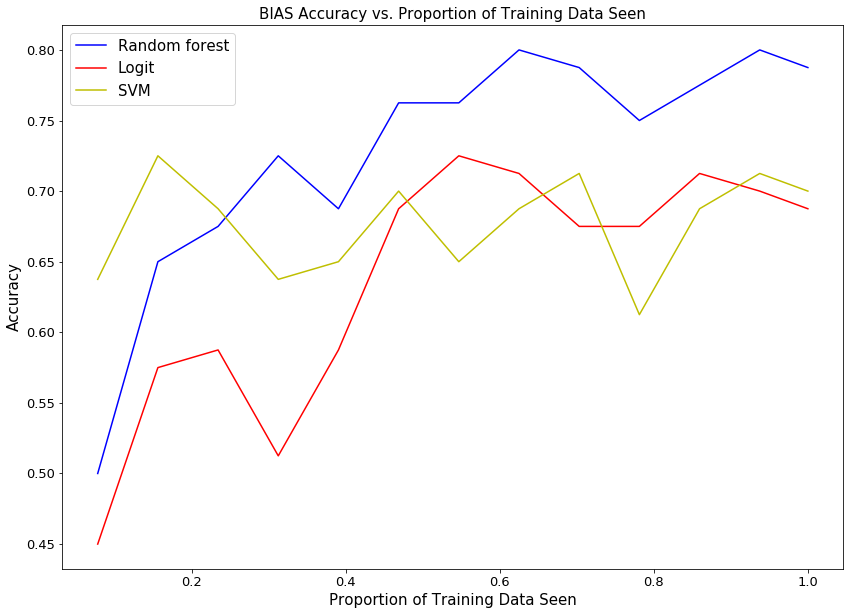

In [232]:
plt.figure(figsize=(14,10))
plt.plot(np.array(train_sizes)/len(train_df), rand_forest_accuracies, 'b')
plt.plot(np.array(train_sizes)/len(train_df), logit_accuracies, 'r')
plt.plot(np.array(train_sizes)/len(train_df), svm_accuracies, 'y')
plt.title('BIAS Accuracy vs. Proportion of Training Data Seen', fontsize = 15)
plt.xlabel('Proportion of Training Data Seen', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(labels = ['Random forest', 'Logit', 'SVM'], fontsize = 15)
plt.tick_params(labelsize=13)
plt.show()

In [233]:
rand_for_acc_mod = [rand_forest_accuracies[i] for i in range(len(rand_forest_accuracies)) if i % 2 == 0]
logit_acc_mod = [logit_accuracies[i] for i in range(len(logit_accuracies)) if i % 2 == 0]
svm_acc_mod = [svm_accuracies[i] for i in range(len(svm_accuracies)) if i % 2 == 0]
train_sizes_mod = [train_sizes[i] for i in range(len(train_sizes)) if i % 2 == 0]

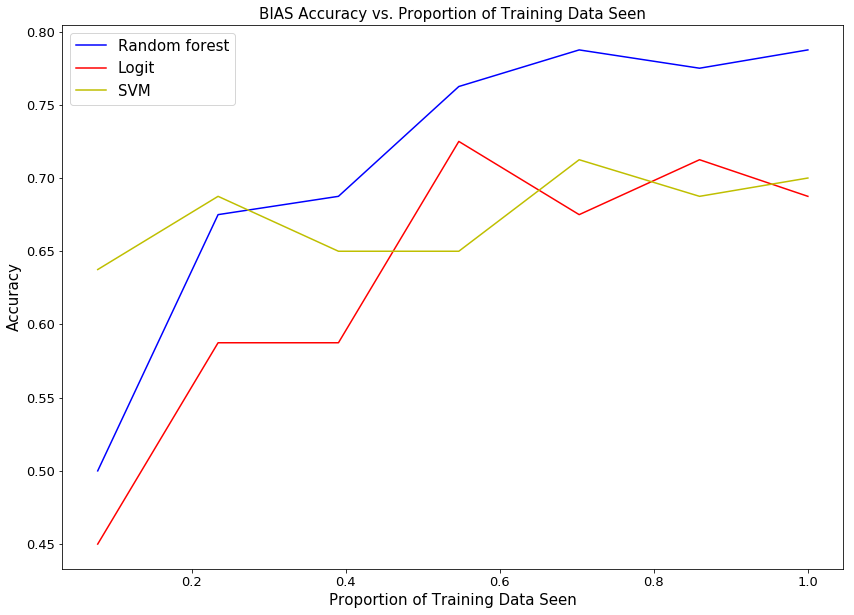

In [234]:
plt.figure(figsize=(14,10))
plt.plot(np.array(train_sizes_mod)/len(train_df), rand_for_acc_mod, 'b')
plt.plot(np.array(train_sizes_mod)/len(train_df), logit_acc_mod, 'r')
plt.plot(np.array(train_sizes_mod)/len(train_df), svm_acc_mod, 'y')
plt.title('BIAS Accuracy vs. Proportion of Training Data Seen', fontsize = 15)
plt.xlabel('Proportion of Training Data Seen', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(labels = ['Random forest', 'Logit', 'SVM'], fontsize = 15)
plt.tick_params(labelsize=13)
plt.show()

In [235]:
print(sklearn.metrics.accuracy_score(test_y, random_forest_small.predict(test_x_standard)))
print(sklearn.metrics.log_loss(test_y, random_forest_small.predict(test_x_standard)))
print(sklearn.metrics.f1_score(test_y, random_forest_small.predict(test_x_standard)))
print(sklearn.metrics.precision_score(test_y, random_forest_small.predict(test_x_standard)))
print(sklearn.metrics.recall_score(test_y, random_forest_small.predict(test_x_standard)))

0.7875
7.33956994366
0.760563380282
0.771428571429
0.75


In [242]:
random_forest_small.feature_importances_

array([ 0.04966435,  0.02790274,  0.04591283,  0.11218201,  0.12384668,
        0.05147949,  0.03934887,  0.04915781,  0.03678403,  0.07492926,
        0.03558241,  0.05152786,  0.07749546,  0.04185423,  0.07865967,
        0.00789607,  0.03002494,  0.06575129])

In [237]:
print(sklearn.metrics.accuracy_score(test_y, logit_small.predict(test_x_standard)))
print(sklearn.metrics.log_loss(test_y, logit_small.predict(test_x_standard)))
print(sklearn.metrics.f1_score(test_y, logit_small.predict(test_x_standard)))
print(sklearn.metrics.precision_score(test_y, logit_small.predict(test_x_standard)))
print(sklearn.metrics.recall_score(test_y, logit_small.predict(test_x_standard)))

0.6875
10.7934675731
0.626865671642
0.677419354839
0.583333333333


In [238]:
print(sklearn.metrics.accuracy_score(test_y, svm_small.predict(test_x_standard)))
print(sklearn.metrics.f1_score(test_y, svm_small.predict(test_x_standard)))
print(sklearn.metrics.precision_score(test_y, svm_small.predict(test_x_standard)))
print(sklearn.metrics.recall_score(test_y, svm_small.predict(test_x_standard)))

0.7
0.647058823529
0.6875
0.611111111111
